#### Stroke Prediction using Machine Learning

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.

The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.

**Dataset Description**
  
The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.

**Data Dictionary**

1. Id - Unique Id
2. gender
3. age
4. hypertension - Binary Feature
5. Heart_disease - Binary Feature
6. Ever_married - Has the patient ever been married
7. Work_type - Work type of a patient
8. Residency_type - Residency type of patient
9. avg_glucose_level - Average Glucose level in the blood
10. bmi - Body mass Index
11. smoking_status - Smoking status of the patient
12. stroke - stroke event


#### Import Libraries

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# Train test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import various functions from sklearn 
from sklearn import metrics,tree

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#SMOTE Technique
#from imblearn.over_sampling import SMOTE
from collections import Counter

#### Data Understanding

Importing the dataset using pandas library 

In [214]:
df_stoke = pd.read_csv(r"/Users/gautambr/Documents/Machine Learning Projects/Stroke Prediction Application/notebook/healthcare_dataset.csv")
df_stoke = df_stoke.sort_values(by="id")
df_stoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4230,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
2333,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2528,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
805,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


Shape/dimension of the dataset

In [215]:
df_stoke.shape

(5110, 12)

In [216]:
df_stoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 4230 to 4332
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [217]:
df_stoke['id'] = df_stoke['id'].astype('object')
df_stoke['hypertension'] = df_stoke['hypertension'].astype('object')
df_stoke['heart_disease'] = df_stoke['heart_disease'].astype('object')

Checking if the dataset contains any missing values

In [218]:
df_stoke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Interpretation :** Only one column has missing values,it's the bmi. need to impute values to the missing values by checking data's skewness.

In [219]:
for i in df_stoke.select_dtypes(include='object').columns[1:]:
    print(f"Cross tab between {i} and stroke")
    print(pd.crosstab(df_stoke[i], df_stoke['stroke']))
    print("\n")

Cross tab between gender and stroke
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0


Cross tab between hypertension and stroke
stroke           0    1
hypertension           
0             4429  183
1              432   66


Cross tab between heart_disease and stroke
stroke            0    1
heart_disease           
0              4632  202
1               229   47


Cross tab between ever_married and stroke
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220


Cross tab between work_type and stroke
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2


Cross tab between Residence_type and stroke
stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135


Cross tab between smoking_status and stroke
stroke              0   1
smoking_sta

In [220]:
df_stoke.duplicated().sum()

0

In [221]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_stoke.columns if df_stoke[feature].dtype != 'O']
categorical_features = [feature for feature in df_stoke.columns if df_stoke[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'avg_glucose_level', 'bmi', 'stroke']

We have 8 categorical features : ['id', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [222]:
df_stoke = df_stoke[df_stoke['gender'].isin(['Male', 'Female'])]

**Interpretation :** From the above cross table info we can see that the gender column has a other values which seems to be redendent. so dropped that row.

##### Skewness

In [223]:
highly_skewed = []
for col in df_stoke.select_dtypes("number").columns:
    col_skew = df_stoke[col].skew()
    print(f"Column {col}",col_skew)
    if col_skew > 1 or col_skew < -1:
        highly_skewed.append(col)
print("Highly skewed columns are : ",highly_skewed)

Column age -0.13743019262921288
Column avg_glucose_level 1.5728153284961561
Column bmi 1.0550629490426457
Column stroke 4.192806807499473
Highly skewed columns are :  ['avg_glucose_level', 'bmi', 'stroke']


##### Descriptive statistics

In [224]:
df_stoke.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In [225]:
df_stoke.describe(include='object').T

,count,unique,top,freq
id,5109,5109,67,1
gender,5109,2,Female,2994
hypertension,5109,2,0,4611
heart_disease,5109,2,0,4833
ever_married,5109,2,Yes,3353
work_type,5109,5,Private,2924
Residence_type,5109,2,Urban,2596
smoking_status,5109,4,never smoked,1892


**Interpretation :** 
1. From the Categorical columns we can see that the cardinality of the values are not that high so we don't need to reduce it further, we can use one hot encoding or even target encoding converting the categorical variable into numerical.
2. The age,bmi column seems to be near normal distribustion but he avg_glucose_level seems to be left skewed. need to scale the values for better modeling 

Understanding the proportion of Stroke samples in the dataset.

In [226]:
stoke_count = df_stoke.stroke.value_counts().reset_index()
stoke_count

,stroke,count
0,0,4860
1,1,249


**Interpretation :** From the count we can see that the dataset is unbalanced towards person's who have strokes so we need to use SMOTE or ADASYN to improve the model performance by imbalancing treatment.

#### Data Visualization

##### Stacked Bar Plot

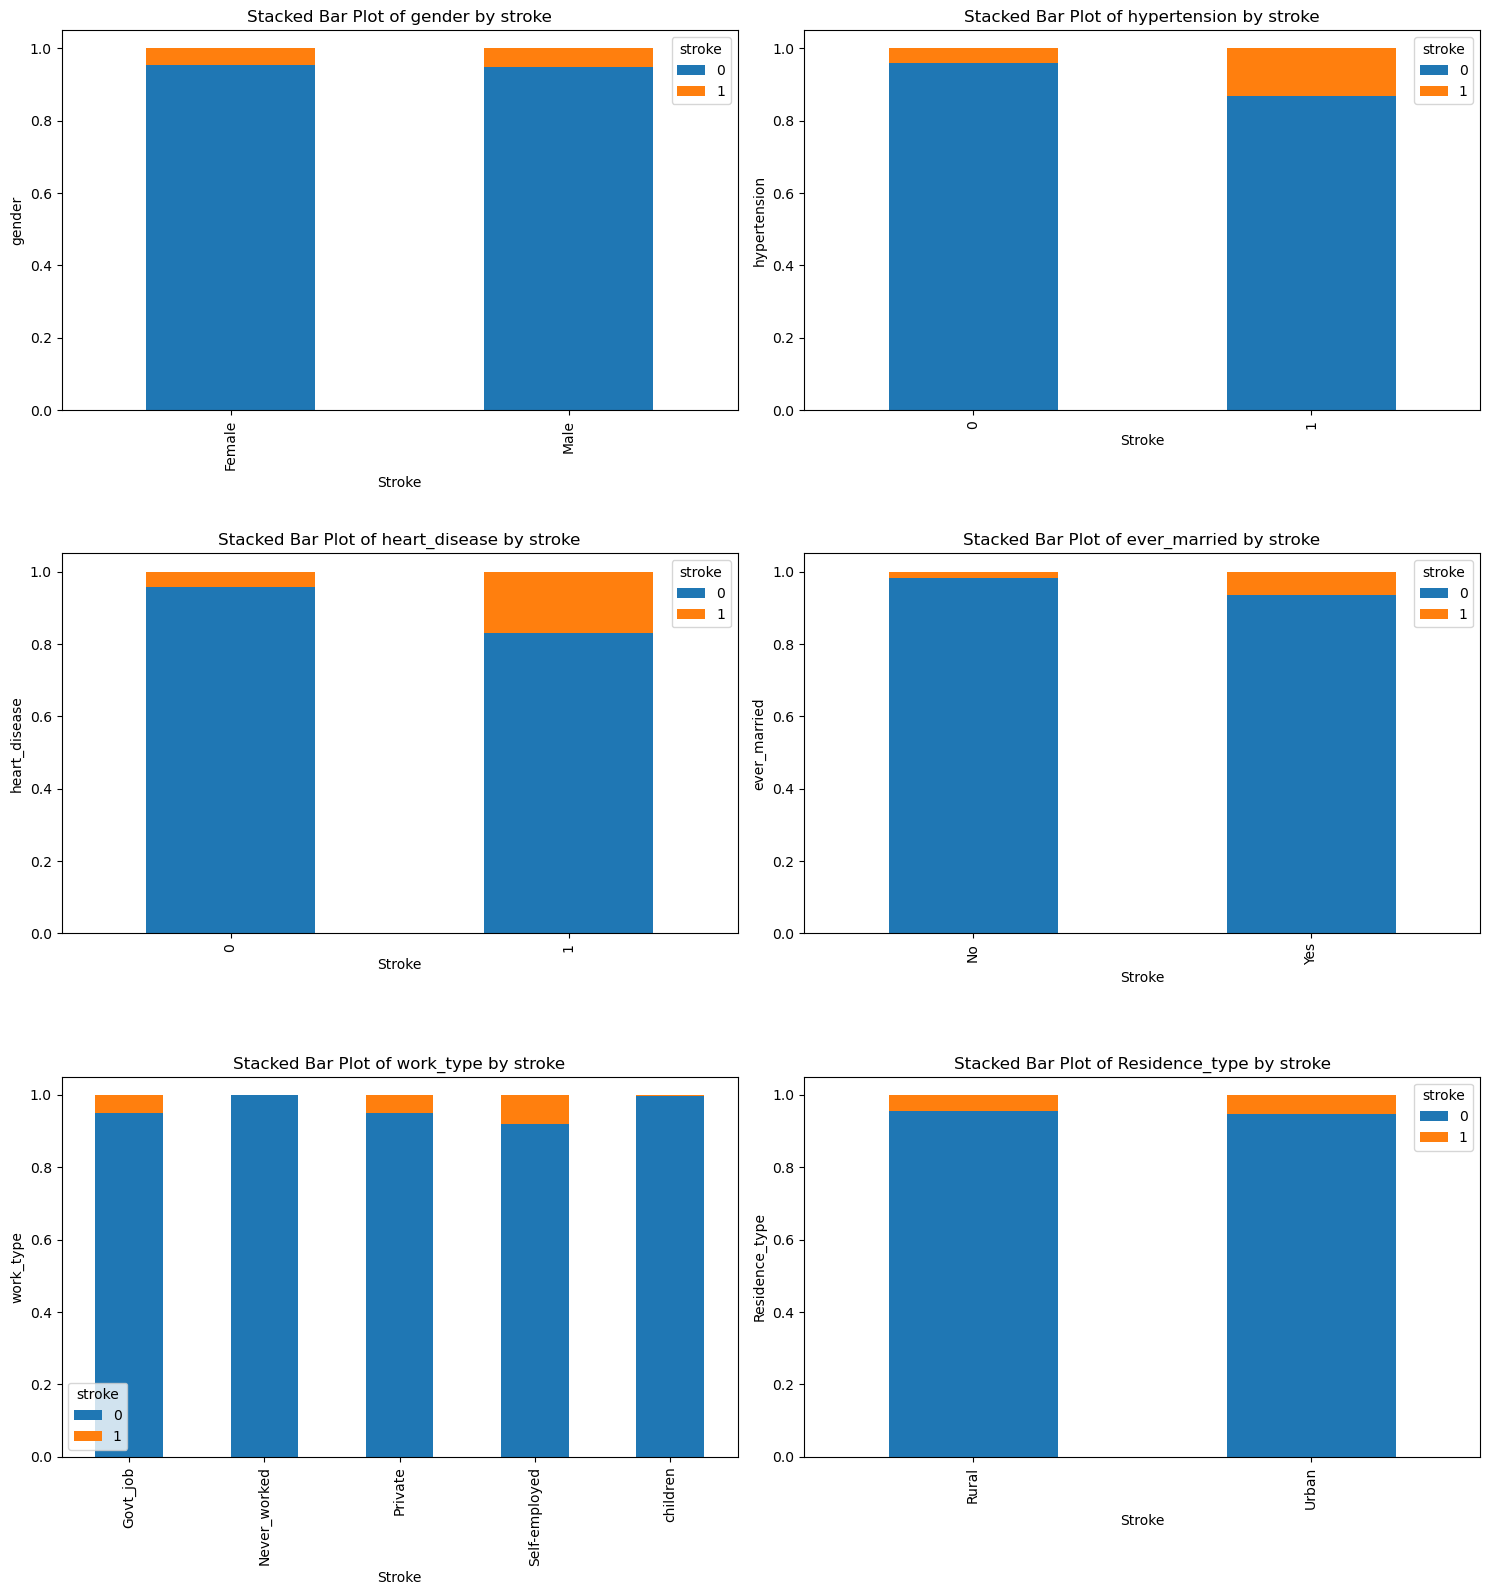

In [227]:
# Select only integer columns
df_numeric = df_stoke.select_dtypes(include=['object'])

# Calculate number of rows needed based on number of columns, assuming 2 columns per row
rows = (len(df_numeric.columns) - 1) // 2 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(15, rows * 5))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop through each column in df_numeric and create a stacked bar plot
for i, col in enumerate(df_numeric.columns[1:-1]):
    # Create the crosstab plot with normalized counts
    crosstab_data = pd.crosstab(df_stoke[col], df_stoke['stroke'], normalize='index')
    crosstab_data.plot(kind='bar', stacked=True, ax=ax[i])
    ax[i].set_xlabel('Stroke')  # Set the x-axis label
    ax[i].set_ylabel(col)  # Set the y-axis label
    ax[i].set_title(f'Stacked Bar Plot of {col} by stroke')  # Set the title

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

##### Histograms

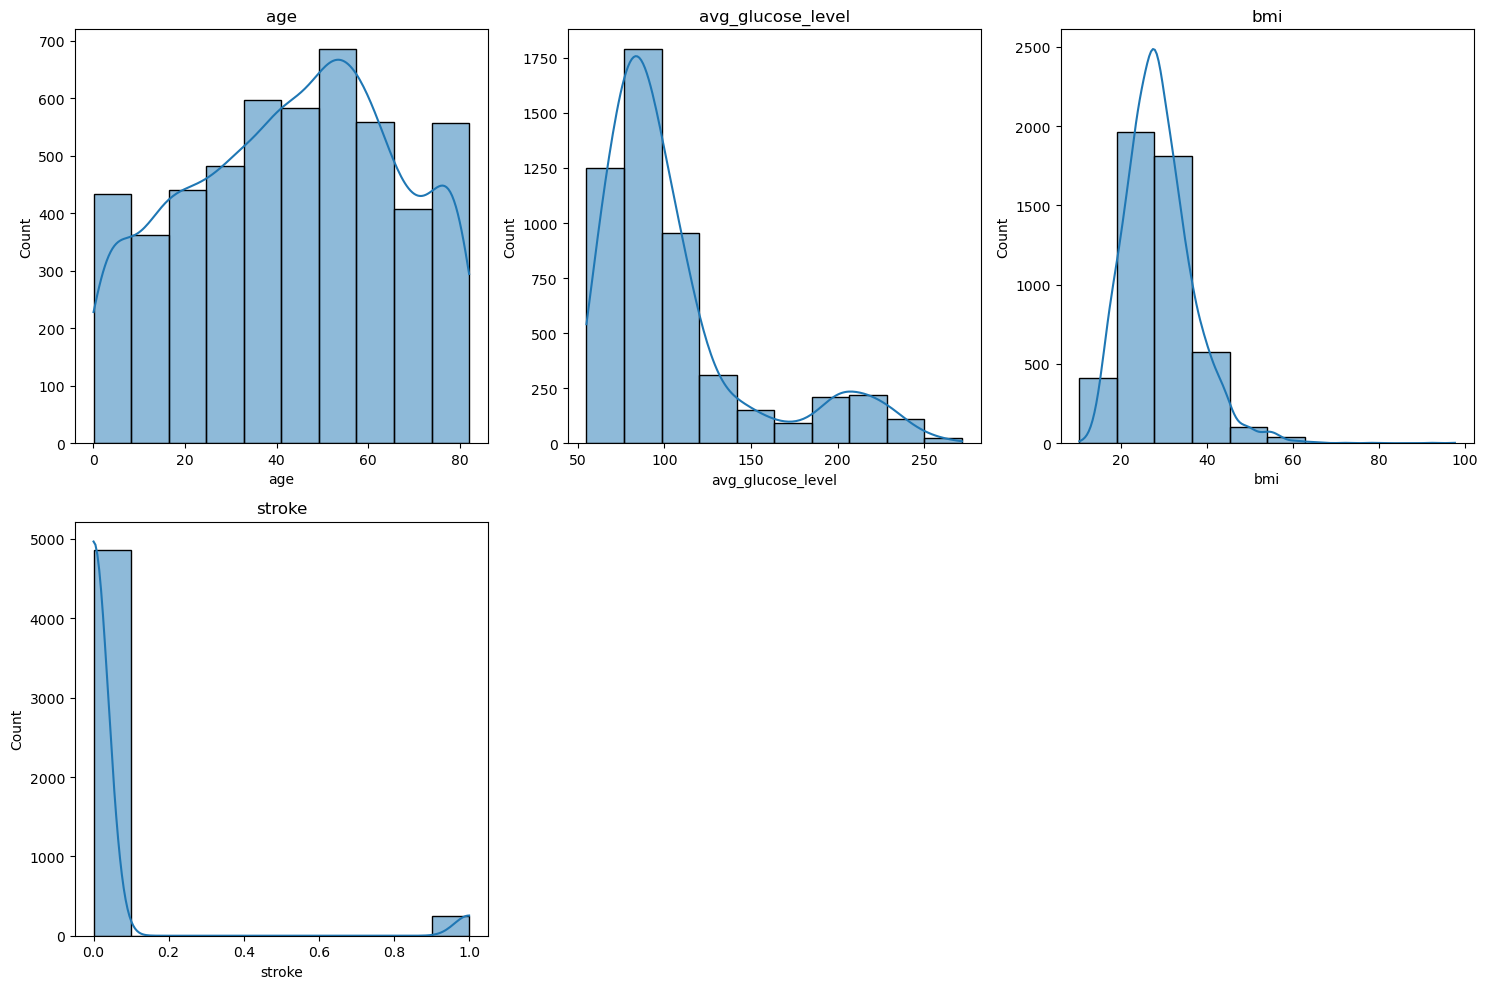

In [228]:
# Select only numerical columns
num_columns = df_stoke.select_dtypes(include='number').columns

# Determine the number of plots
num_plots = len(num_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms using Seaborn
for i, col in enumerate(num_columns):
    sns.histplot(df_stoke[col], ax=axes[i], bins=10, kde=True)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

##### Box Plot

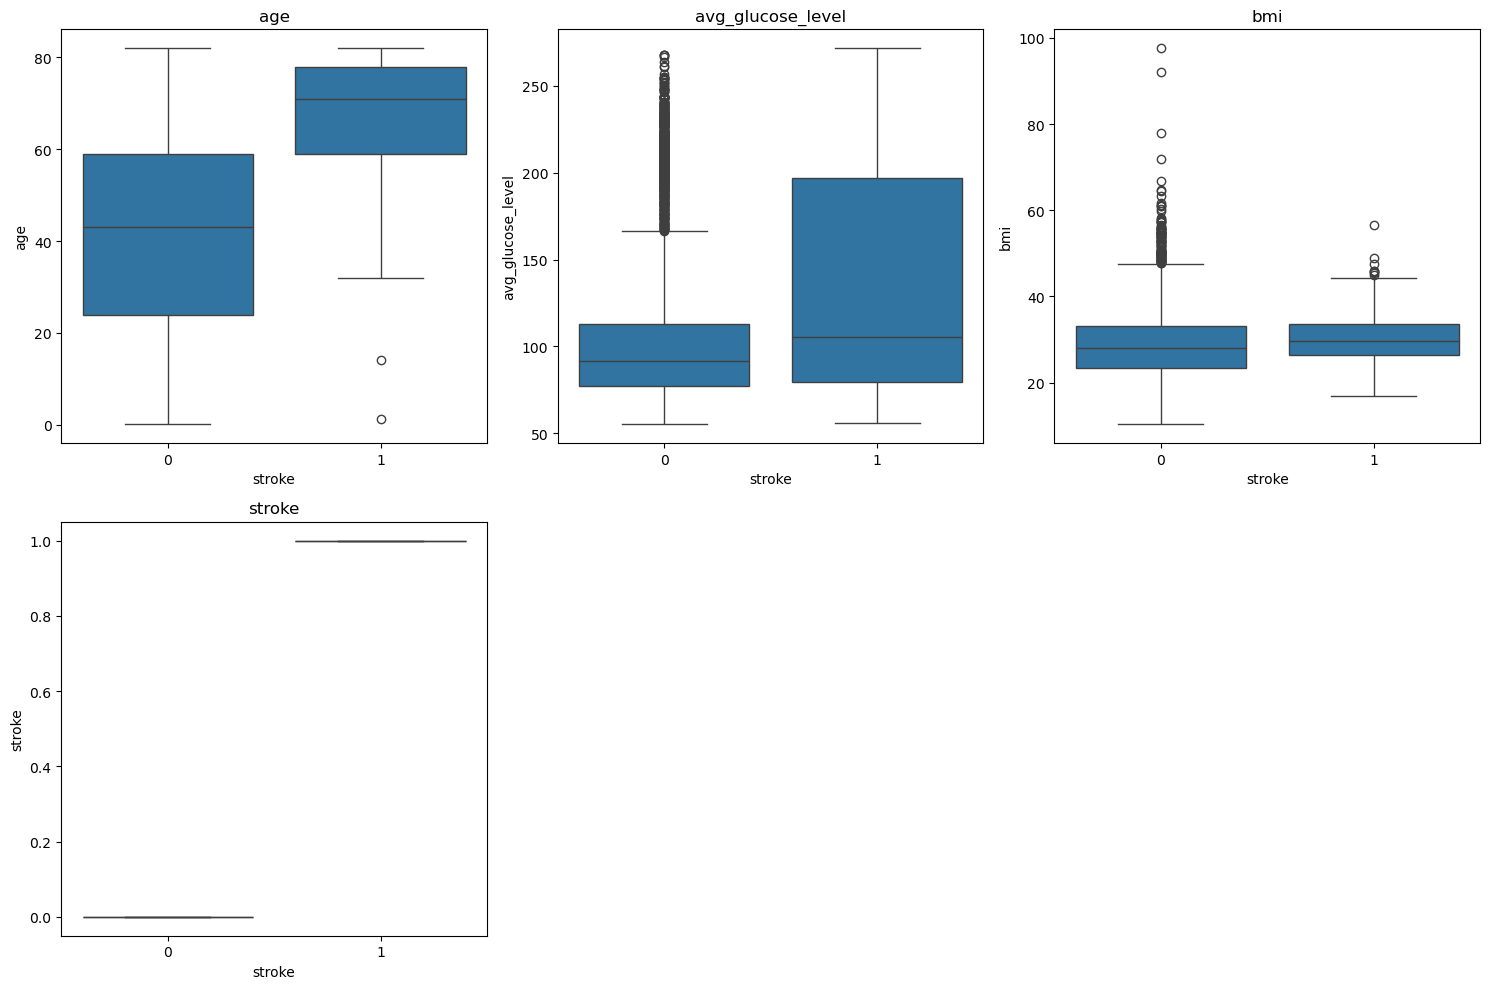

In [229]:
# Select only numerical columns
num_columns = df_stoke.select_dtypes(include='number').columns

# Determine the number of plots
num_plots = len(num_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms using Seaborn
for i, col in enumerate(num_columns):
    sns.boxplot(data = df_stoke,x='stroke',y=col, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

##### Heat Map

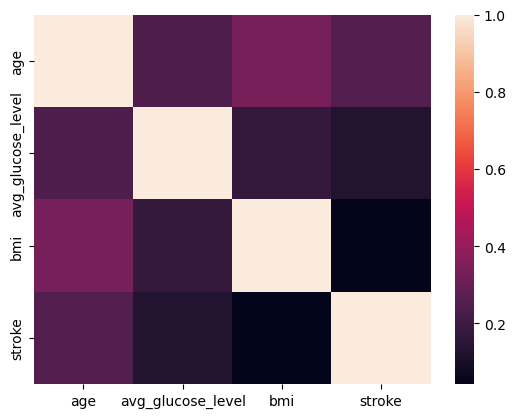

In [230]:
sns.heatmap(df_stoke.select_dtypes('number').corr())
plt.show()

##### Pair plot

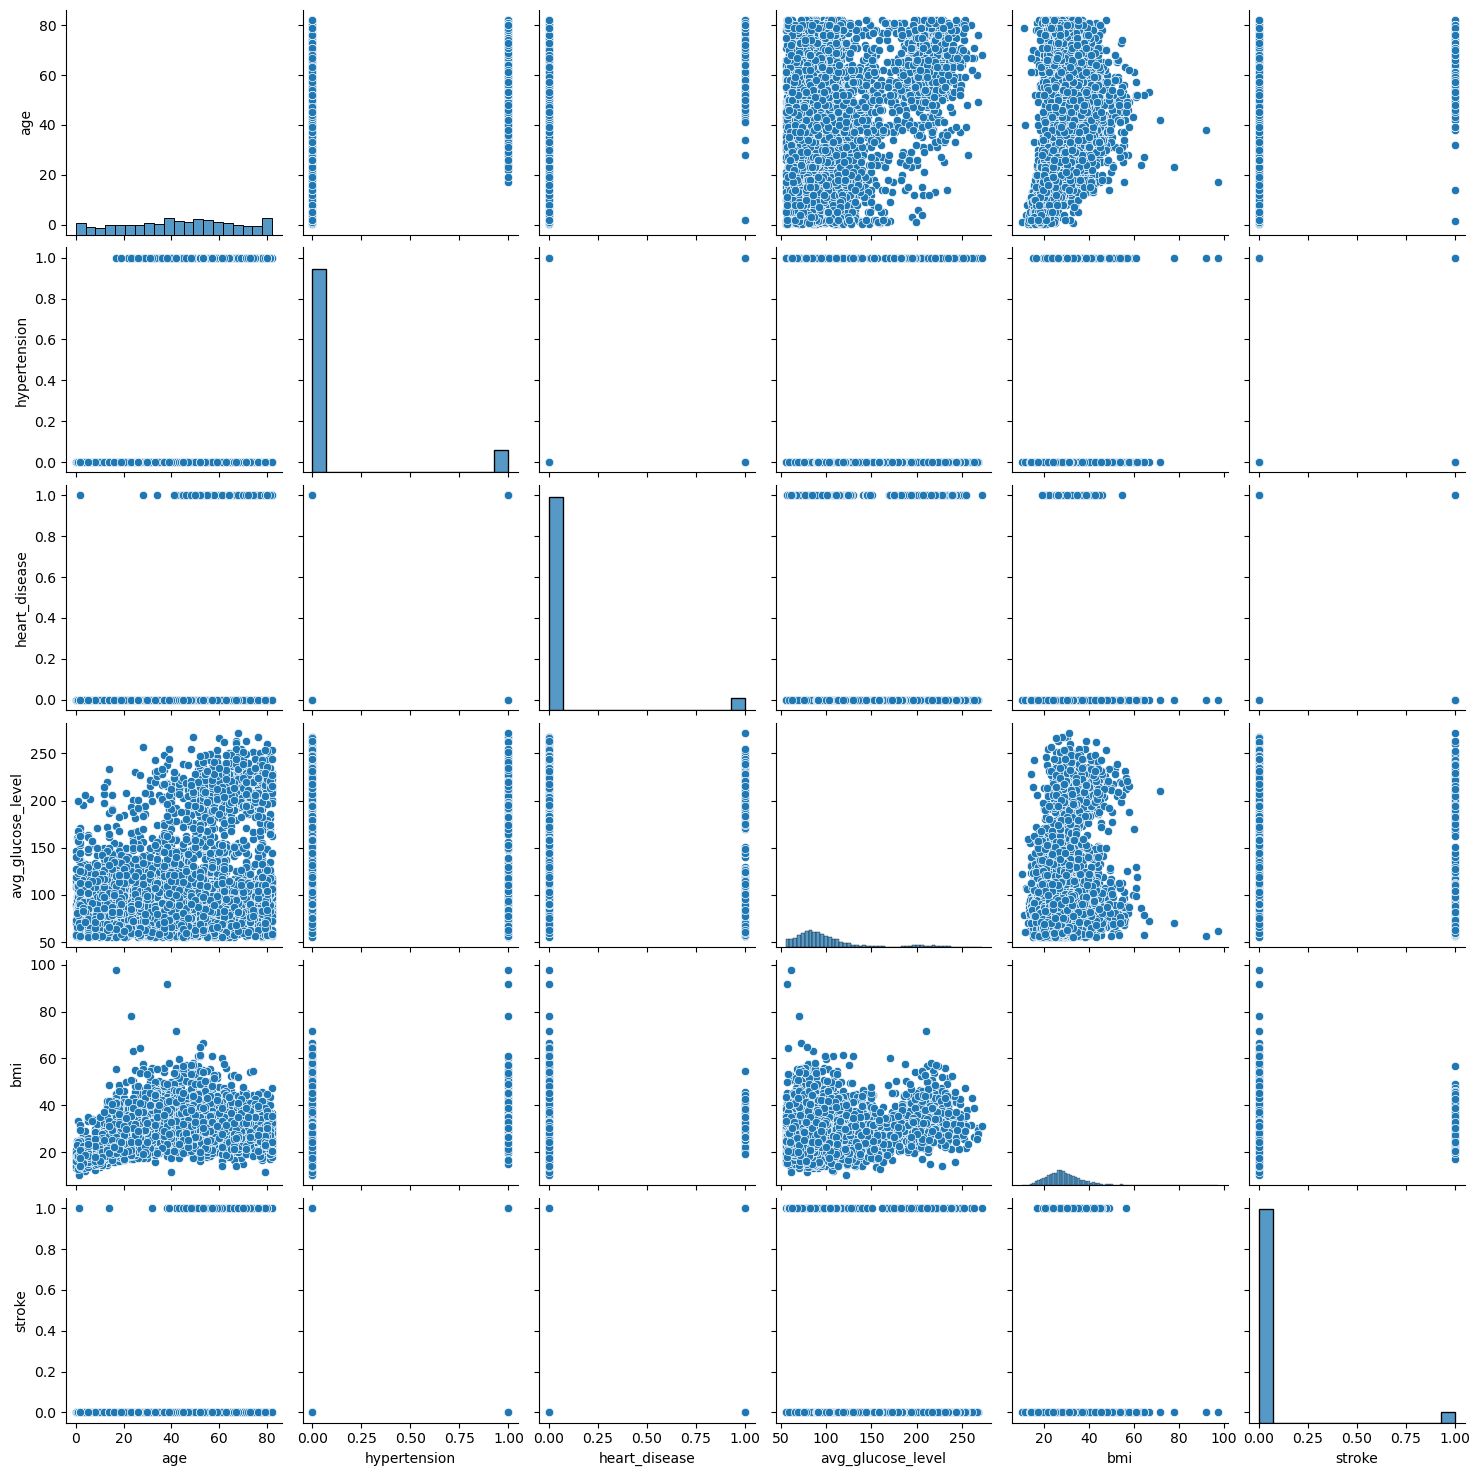

In [231]:
sns.pairplot(df_stoke.drop(["id"],axis=1))
plt.show()

##### Scatter Plot

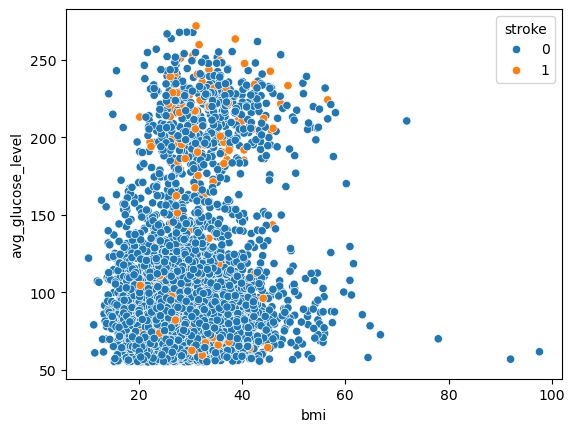

In [232]:
sns.scatterplot(data = df_stoke,x=df_stoke["bmi"],y=df_stoke["avg_glucose_level"],hue=df_stoke["stroke"])
plt.show()

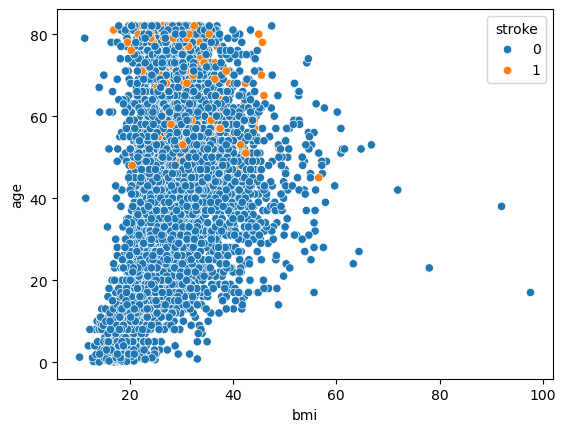

In [233]:
sns.scatterplot(data = df_stoke,x=df_stoke["bmi"],y=df_stoke["age"],hue=df_stoke["stroke"])
plt.show()

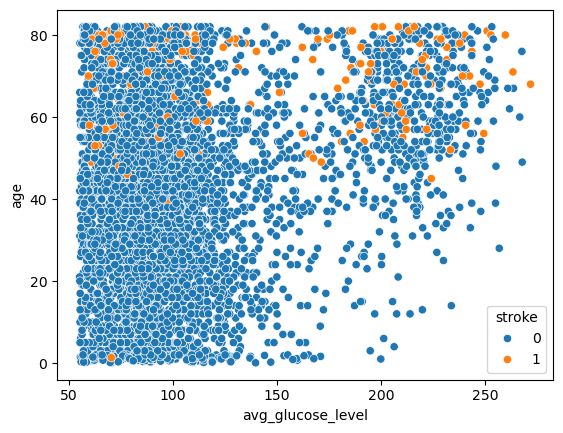

In [234]:
sns.scatterplot(data = df_stoke,x=df_stoke["avg_glucose_level"],y=df_stoke["age"],hue=df_stoke["stroke"])
plt.show()

##### Pie Chart

Using the pie chart visualizing the proportion of different smoking categories among the stroke. checking if smoking has direct effect on cause of stroke.

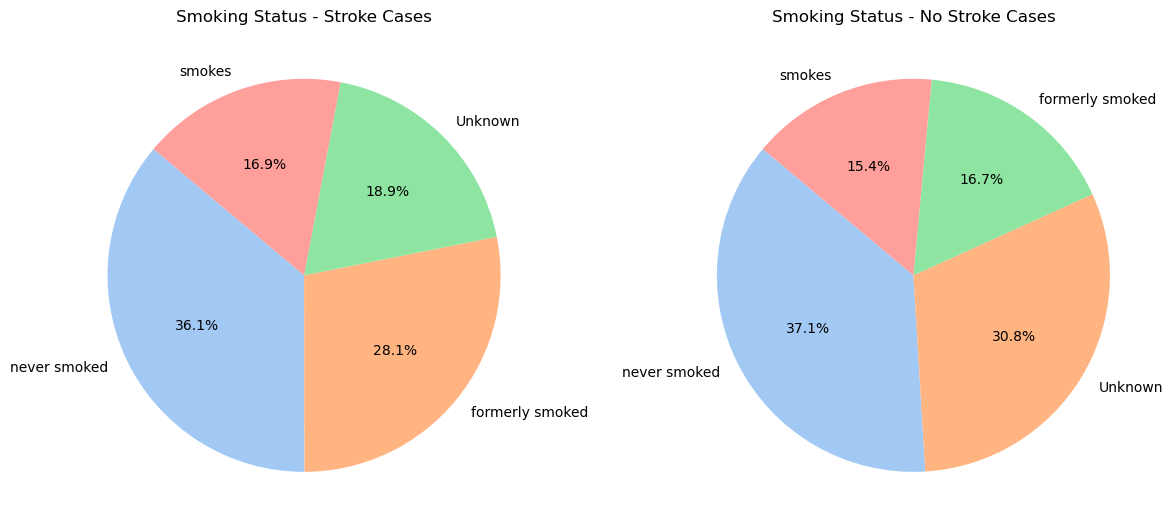

In [235]:
# Data for Stroke cases
Stroke_Smoking_status = df_stoke[df_stoke["stroke"] == 1]["smoking_status"].value_counts()

# Data for No-Stroke cases
NO_Stroke_Smoking_status = df_stoke[df_stoke["stroke"] == 0]["smoking_status"].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Stroke pie chart
axes[0].pie(Stroke_Smoking_status, labels=Stroke_Smoking_status.index, 
            autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
axes[0].set_title("Smoking Status - Stroke Cases")

# No Stroke pie chart
axes[1].pie(NO_Stroke_Smoking_status, labels=NO_Stroke_Smoking_status.index, 
            autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
axes[1].set_title("Smoking Status - No Stroke Cases")

# Display the plot
plt.tight_layout()
plt.show()

#### Train and Test Split

In [236]:
X = df_stoke.drop(["stroke"],axis = 1)
y = df_stoke["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify=y,random_state = 20)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3576, 11) (1533, 11) (3576,) (1533,)


In [237]:
df_stoke_train = pd.concat([X_train,y_train],axis =1)
df_stoke_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2892,33876,Male,10.0,0,0,No,children,Urban,87.09,14.3,Unknown,0
3828,36431,Male,39.0,0,0,Yes,Govt_job,Rural,155.23,36.2,never smoked,0
4025,40242,Male,5.0,0,0,No,children,Rural,104.55,16.3,Unknown,0
2804,51342,Female,69.0,0,0,Yes,Govt_job,Rural,70.98,30.0,Unknown,0
4348,40705,Female,47.0,0,0,Yes,Self-employed,Rural,66.16,31.5,never smoked,0


In [238]:
df_stoke_test = pd.concat([X_test,y_test],axis =1)
df_stoke_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1861,42713,Female,45.0,0,0,Yes,Private,Urban,115.23,28.0,never smoked,0
1570,43271,Female,24.0,0,0,No,Govt_job,Urban,63.40,20.3,smokes,0
4693,44355,Female,48.0,0,0,Yes,Private,Rural,74.16,19.9,never smoked,0
4696,67466,Male,63.0,1,0,Yes,Private,Urban,232.78,31.8,formerly smoked,0
4469,22151,Female,28.0,0,0,No,Govt_job,Rural,77.99,32.0,smokes,0


12. Perform hypothesis testing to find the significant variables.

#### Feature Engineering

##### Missing value imputation

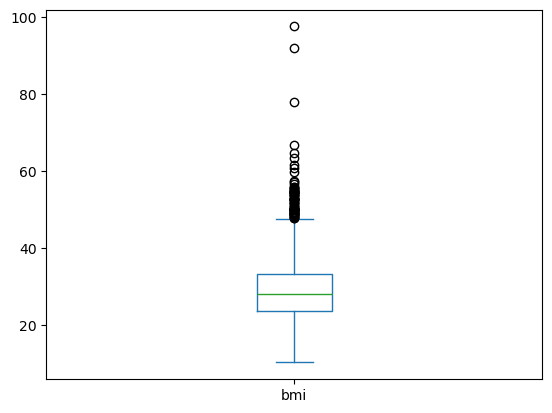

In [239]:
df_stoke_train["bmi"].plot(kind="box")
plt.show()

Too many outliers present so using median to fill the values

In [240]:
bmi_median = df_stoke_train["bmi"].median()
df_stoke_train["bmi"].fillna(bmi_median, inplace=True)
df_stoke_test["bmi"].fillna(bmi_median, inplace=True)

In [241]:
df_stoke_train.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Missing values handled

##### Feature Transformation

np.log1p() is a direct mathematical operation (not a learned transformation like StandardScaler), it's safe to apply directly to both datasets without fitting separately.

In [242]:
col_to_transform = ['age', 'avg_glucose_level', 'bmi']

# Apply log transformation separately to train and test data
df_stoke_train[col_to_transform] = np.log1p(df_stoke_train[col_to_transform])
df_stoke_test[col_to_transform] = np.log1p(df_stoke_test[col_to_transform])

In [243]:
df_stoke_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2892,33876,Male,2.397895,0,0,No,children,Urban,4.478359,2.727853,Unknown,0
3828,36431,Male,3.688879,0,0,Yes,Govt_job,Rural,5.051329,3.616309,never smoked,0
4025,40242,Male,1.791759,0,0,No,children,Rural,4.659185,2.850707,Unknown,0
2804,51342,Female,4.248495,0,0,Yes,Govt_job,Rural,4.276388,3.433987,Unknown,0
4348,40705,Female,3.871201,0,0,Yes,Self-employed,Rural,4.207078,3.481240,never smoked,0


##### Label Assignment 

1. work_type - ('Private':0,'Selfemployed':1,'Govt_job':2,'children':3,'Never_worked':4)
2. ever_married - ('Yes': 1, 'No': 0)
3. smoking_status - ('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3)

In [244]:
#work_type
df_stoke_train.work_type = df_stoke_train.work_type.replace("Private",0).replace("Self-employed",1).replace("Govt_job",2).replace("children",3).replace("Never_worked",4)
df_stoke_test.work_type = df_stoke_test.work_type.replace("Private",0).replace("Self-employed",1).replace("Govt_job",2).replace("children",3).replace("Never_worked",4)

#ever_married
df_stoke_train.ever_married = df_stoke_train.ever_married.replace("No",0).replace("Yes",1)
df_stoke_test.ever_married = df_stoke_test.ever_married.replace("No",0).replace("Yes",1)

#smoking_status
df_stoke_train.smoking_status = df_stoke_train.smoking_status.replace("never smoked",0).replace("Unknown",1).replace("formerly smoked",2).replace("smokes",3)
df_stoke_test.smoking_status = df_stoke_test.smoking_status.replace("never smoked",0).replace("Unknown",1).replace("formerly smoked",2).replace("smokes",3)

In [245]:
df_stoke_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2892,33876,Male,2.397895,0,0,0,3,Urban,4.478359,2.727853,1,0
3828,36431,Male,3.688879,0,0,1,2,Rural,5.051329,3.616309,0,0
4025,40242,Male,1.791759,0,0,0,3,Rural,4.659185,2.850707,1,0
2804,51342,Female,4.248495,0,0,1,2,Rural,4.276388,3.433987,1,0
4348,40705,Female,3.871201,0,0,1,1,Rural,4.207078,3.481240,0,0


Removing Insignificant column

In [246]:
df_stoke_train.drop("id",axis=1,inplace = True)
df_stoke_test.drop("id",axis=1,inplace = True)

##### Feature Encoding

In [247]:
df_num = df_stoke_train.drop(['gender','Residence_type'],axis =1)
df_cat = df_stoke_train[['gender','Residence_type']]
df_dummies = pd.get_dummies(data = df_cat,drop_first = True,dtype="int")
df_stoke_train = pd.concat([df_num,df_dummies],axis=1)
df_stoke_train.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,Residence_type_Urban
2892,2.397895,0,0,0,3,4.478359,2.727853,1,0,1,1
3828,3.688879,0,0,1,2,5.051329,3.616309,0,0,1,0
4025,1.791759,0,0,0,3,4.659185,2.850707,1,0,1,0
2804,4.248495,0,0,1,2,4.276388,3.433987,1,0,0,0
4348,3.871201,0,0,1,1,4.207078,3.481240,0,0,0,0


In [248]:
df_num = df_stoke_test.drop(['gender','Residence_type'],axis =1)
df_cat = df_stoke_test[['gender','Residence_type']]
df_dummies = pd.get_dummies(data = df_cat,drop_first = True,dtype="int")
df_stoke_test = pd.concat([df_num,df_dummies],axis=1)
df_stoke_test.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,Residence_type_Urban
1861,3.828641,0,0,1,0,4.755571,3.367296,0,0,0,1
1570,3.218876,0,0,0,2,4.165114,3.058707,3,0,0,1
4693,3.891820,0,0,1,0,4.319619,3.039749,0,0,0,0
4696,4.158883,1,0,1,0,5.454381,3.490429,2,0,1,1
4469,3.367296,0,0,0,2,4.369321,3.496508,3,0,0,0


Converting the boolean columns into a integer

In [249]:
df_stoke_test['hypertension'] = df_stoke_test['hypertension'].astype('int')
df_stoke_test['heart_disease'] = df_stoke_test['heart_disease'].astype('int')

In [250]:
df_stoke_train['hypertension'] = df_stoke_train['hypertension'].astype('int')
df_stoke_train['heart_disease'] = df_stoke_train['heart_disease'].astype('int')

In [251]:
df_stoke_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3576 entries, 2892 to 2833
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   3576 non-null   float64
 1   hypertension          3576 non-null   int64  
 2   heart_disease         3576 non-null   int64  
 3   ever_married          3576 non-null   int64  
 4   work_type             3576 non-null   int64  
 5   avg_glucose_level     3576 non-null   float64
 6   bmi                   3576 non-null   float64
 7   smoking_status        3576 non-null   int64  
 8   stroke                3576 non-null   int64  
 9   gender_Male           3576 non-null   int64  
 10  Residence_type_Urban  3576 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 335.2 KB


In [252]:
# # import StandardScaler to perform scaling
# from sklearn.preprocessing import StandardScaler 

# scalar = StandardScaler()

# col_to_scale = df_stoke.select_dtypes(include = "float")

# scaled_col = scalar.fit_transform(col_to_scale)

# df_scaled = pd.DataFrame(scaled_col,columns = col_to_scale.columns)

# for col in col_to_scale.columns:
#     df_stoke[col] = df_scaled[col]
# df_stoke.head()

In [253]:
X_train = df_stoke_train.drop(['stroke'],axis =1)
y_train = df_stoke_train['stroke']

X_test = df_stoke_test.drop(['stroke'],axis =1)
y_test = df_stoke_test['stroke']

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3576, 10) (1533, 10) (3576,) (1533,)


##### Model Functions

In [254]:
df_result = pd.DataFrame(columns=['Model Name','Recall 0','Recall 1','F1-Score 0','F1-Score 1'])
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1


**Classification Report**

In [255]:
def get_test_report(model, test_data, target_data):
    # Predict the probabilities for the positive class
    y_proba = model.predict_proba(test_data)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(target_data, y_proba)

    # Compute Youden's J statistic
    j_scores = tpr - fpr
    best_index = np.argmax(j_scores)
    best_threshold = thresholds[best_index]

    print(f'Best threshold according to Youden\'s J statistic: {best_threshold}')
    print("\n")

    # Predict classes based on a specific threshold
    y_pred = (y_proba >= best_threshold).astype(int)  # Using best_threshold for prediction

    # Generate classification report
    report = classification_report(target_data, y_pred)
    print(report)

    # Return the classification report for test data
    return classification_report(target_data, y_pred, output_dict=True)

**Confusion Matrix**

In [256]:
def plot_confusion_matrix(model, test_data, target_data):
    # Predict the probabilities for the positive class
    y_proba = model.predict_proba(test_data)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(target_data, y_proba)

    # Compute Youden's J statistic
    j_scores = tpr - fpr
    best_index = np.argmax(j_scores)
    best_threshold = thresholds[best_index]

    # Predict classes based on the best threshold
    y_pred = (y_proba >= best_threshold).astype(int)

    # Create a confusion matrix
    cm = confusion_matrix(target_data, y_pred)

    # Label the confusion matrix
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

    # Plot a heatmap to visualize the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                linewidths=0.1, annot_kws={'size': 12})

    # Set the font size of x-axis and y-axis ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

**ROC & AUC Curve**

In [257]:
def plot_roc(model, X_test, y_test):
    """
    Plots the ROC curve for a binary classification model and calculates the ROC-AUC score.

    Parameters:
    - model: Trained machine learning model with `predict_proba` method
    - X_test: Features of the test set
    - y_test: True target values of the test set
    """
    # Predict the probability of the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')

    # Plot the diagonal line representing a random classifier
    plt.plot([0, 1], [0, 1], 'r--')

    # Set the limits for the x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # Add plot and axes labels
    plt.title('ROC Curve for Binary Classification', fontsize=15)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

    # Add a legend to the plot
    plt.legend(loc='lower right')

    # Add grid lines for better readability
    plt.grid(True)

    # Display the plot
    plt.show()

##### Logistic Regression

In [258]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.166834
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.1424
Time:                        06:50:11   Log-Likelihood:                -596.60
converged:                       True   LL-Null:                       -695.69
Covariance Type:            nonrobust   LLR p-value:                 7.966e-38
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      1.8030      0.233      7.729      0.000       1.346       2.260

In [259]:
y_train.dtype

dtype('int64')

In [260]:
# Instantiate the LogisticRegression model
logistic_model = LogisticRegression()

# Fit the model using the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

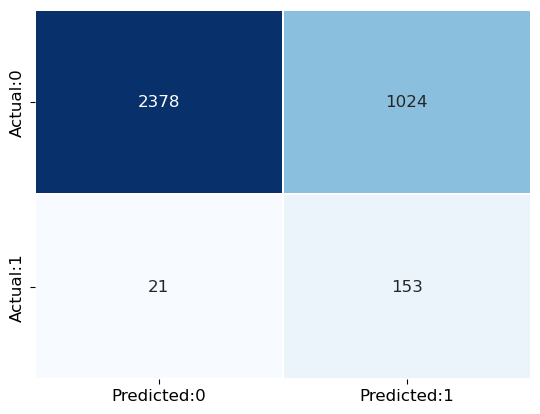

In [261]:
plot_confusion_matrix(logistic_model,X_train,y_train)

In [262]:
report = get_test_report(logistic_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.04731154960195982


              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3402
           1       0.13      0.88      0.23       174

    accuracy                           0.71      3576
   macro avg       0.56      0.79      0.52      3576
weighted avg       0.95      0.71      0.79      3576



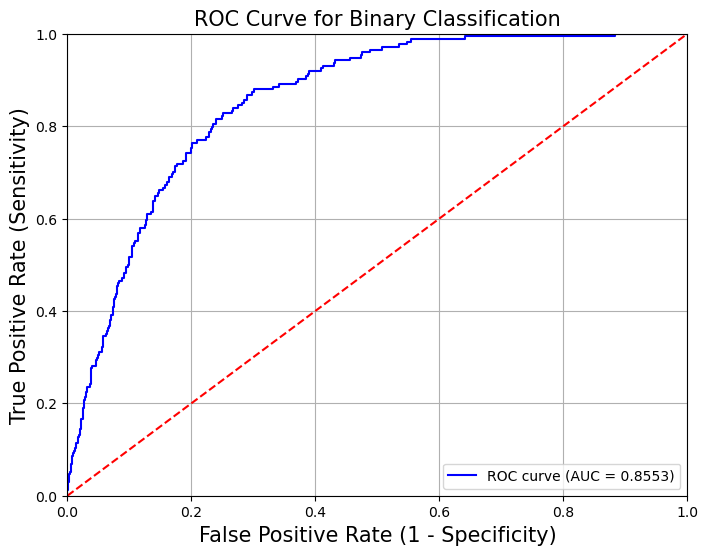

In [263]:
plot_roc(logistic_model,X_train,y_train)

In [264]:
df_result.loc[0] = ['Logistic Regression Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.699,0.8793,0.8199,0.2265


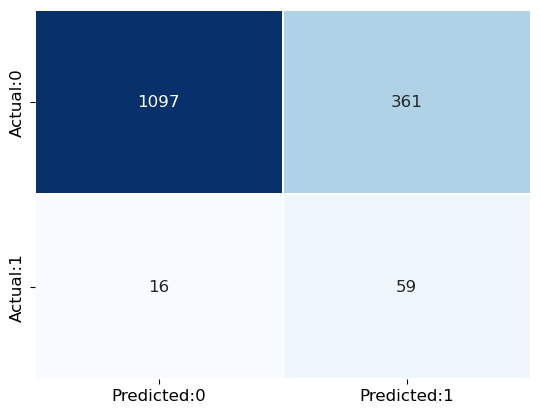

In [265]:
plot_confusion_matrix(logistic_model,X_test,y_test)

In [266]:
report = get_test_report(logistic_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.06628657036689042


              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1458
           1       0.14      0.79      0.24        75

    accuracy                           0.75      1533
   macro avg       0.56      0.77      0.55      1533
weighted avg       0.94      0.75      0.82      1533



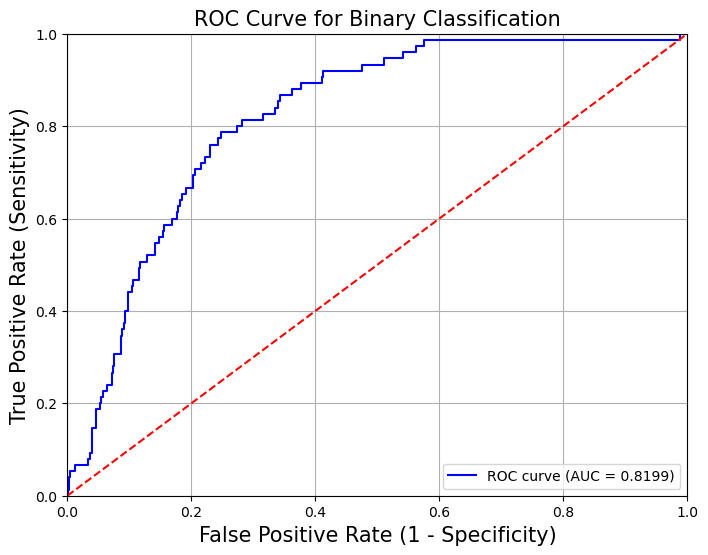

In [267]:
plot_roc(logistic_model,X_test,y_test)

In [268]:
df_result.loc[1] = ['Logistic Regression Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384


##### K-nearest neighbor

In [269]:
knn_classification = KNeighborsClassifier()
knn_model = knn_classification.fit(X_train, y_train)

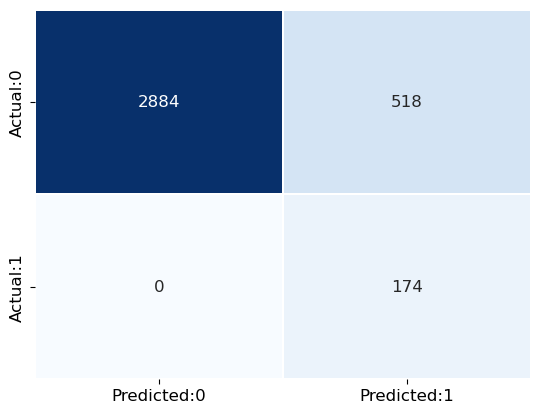

In [270]:
plot_confusion_matrix(knn_model,X_train,y_train)

In [271]:
report = get_test_report(knn_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.2


              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3402
           1       0.25      1.00      0.40       174

    accuracy                           0.86      3576
   macro avg       0.63      0.92      0.66      3576
weighted avg       0.96      0.86      0.89      3576



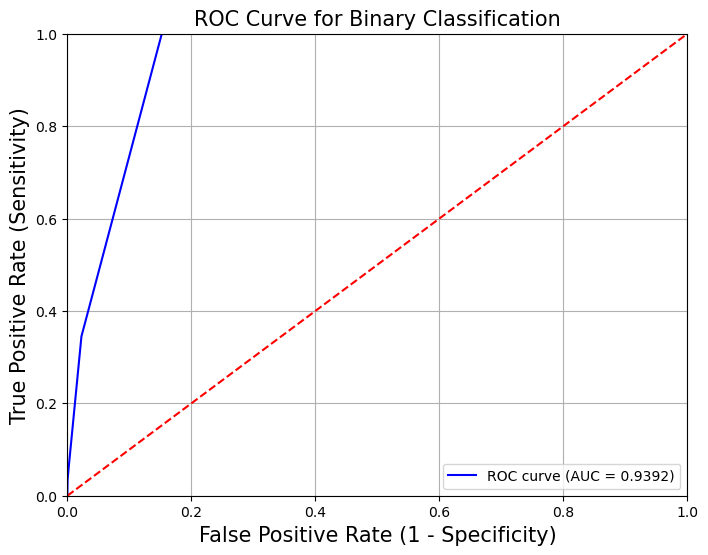

In [272]:
plot_roc(knn_model,X_train,y_train)

In [273]:
df_result.loc[2] = ['KNN Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018


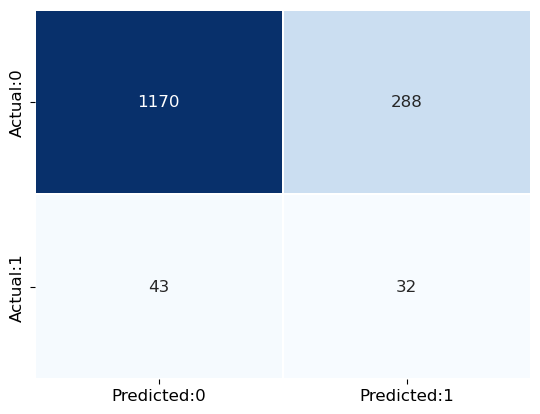

In [274]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [275]:
report = get_test_report(knn_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.2


              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1458
           1       0.10      0.43      0.16        75

    accuracy                           0.78      1533
   macro avg       0.53      0.61      0.52      1533
weighted avg       0.92      0.78      0.84      1533



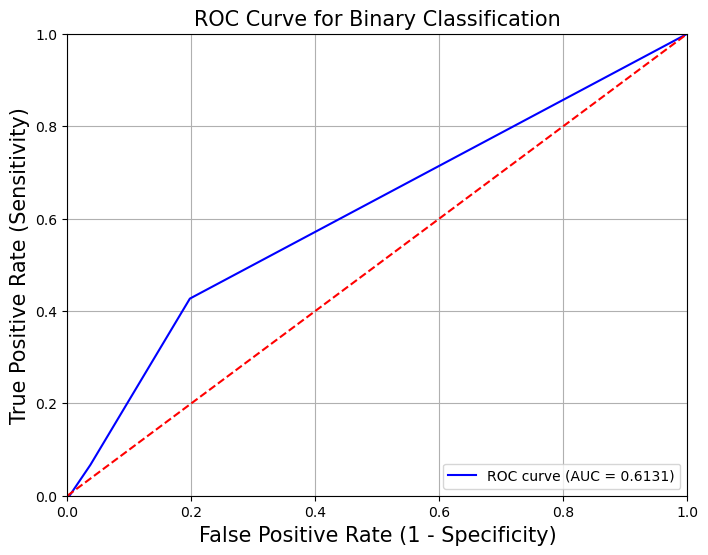

In [276]:
plot_roc(knn_model,X_test,y_test)

In [277]:
df_result.loc[3] = ['KNN Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620


##### Naive Bayes Algorithm

In [278]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

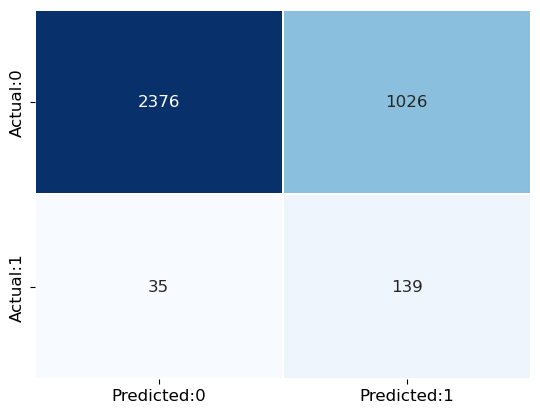

In [279]:
plot_confusion_matrix(gnb_model,X_train,y_train)

In [280]:
report = get_test_report(gnb_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.08504793674400501


              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3402
           1       0.12      0.80      0.21       174

    accuracy                           0.70      3576
   macro avg       0.55      0.75      0.51      3576
weighted avg       0.94      0.70      0.79      3576



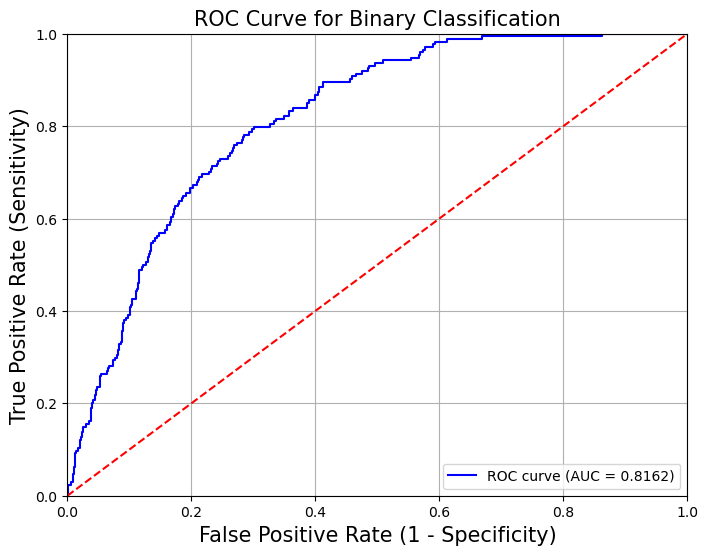

In [281]:
plot_roc(gnb_model,X_train,y_train)

In [282]:
df_result.loc[4] = ['GaussianNB Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076


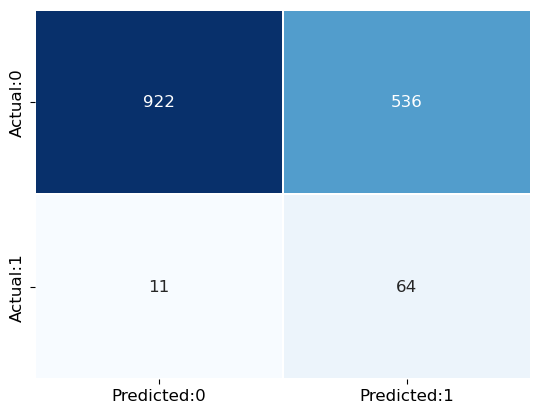

In [283]:
plot_confusion_matrix(gnb_model,X_test,y_test)

In [284]:
report = get_test_report(gnb_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.0580763431482531


              precision    recall  f1-score   support

           0       0.99      0.63      0.77      1458
           1       0.11      0.85      0.19        75

    accuracy                           0.64      1533
   macro avg       0.55      0.74      0.48      1533
weighted avg       0.95      0.64      0.74      1533



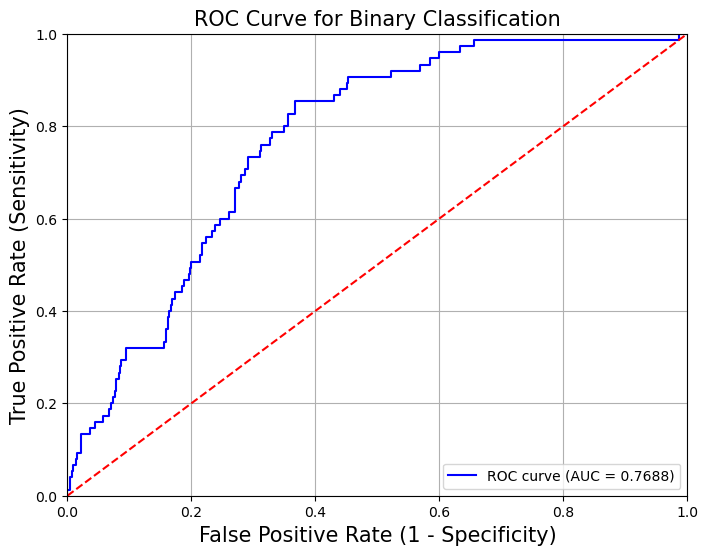

In [285]:
plot_roc(gnb_model,X_test,y_test)

In [286]:
df_result.loc[5] = ['GaussianNB Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896


##### Decision tree

In [287]:
decision_tree_classification = DecisionTreeClassifier()

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

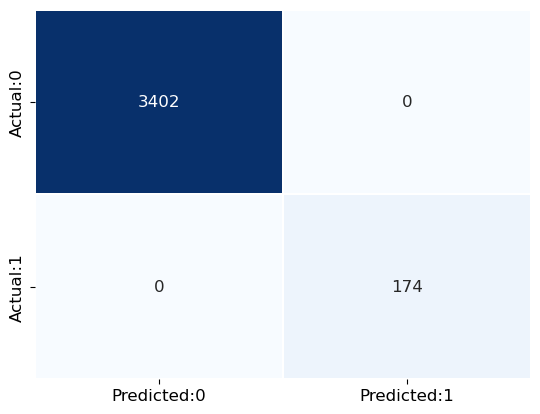

In [288]:
plot_confusion_matrix(decision_tree,X_train,y_train)

In [289]:
report = get_test_report(decision_tree,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3576
   macro avg       1.00      1.00      1.00      3576
weighted avg       1.00      1.00      1.00      3576



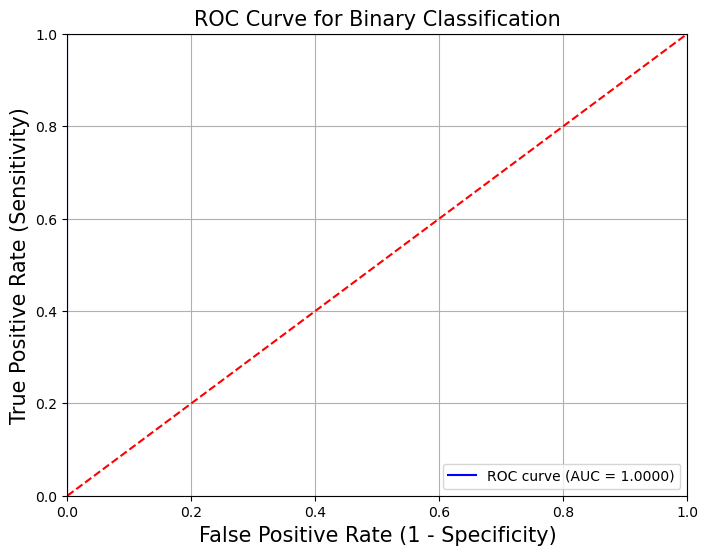

In [290]:
plot_roc(decision_tree,X_train,y_train)

In [291]:
df_result.loc[6] = ['Decision tree Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000


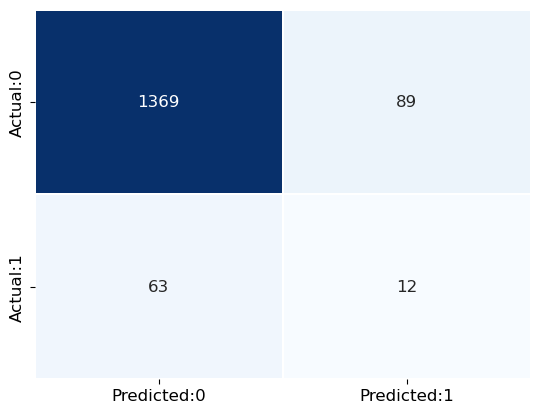

In [292]:
plot_confusion_matrix(decision_tree,X_test,y_test)

In [293]:
report = get_test_report(decision_tree,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 1.0


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.12      0.16      0.14        75

    accuracy                           0.90      1533
   macro avg       0.54      0.55      0.54      1533
weighted avg       0.92      0.90      0.91      1533



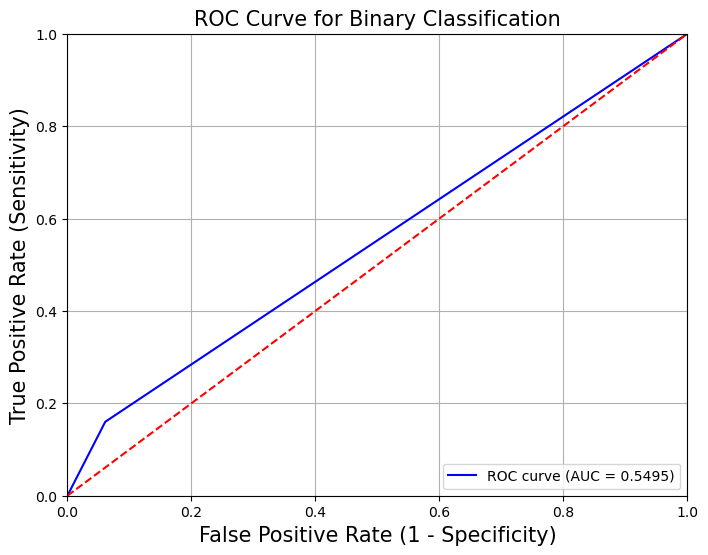

In [294]:
plot_roc(decision_tree,X_test,y_test)

In [295]:
df_result.loc[7] = ['Decision tree Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364


**Random Forest**

In [296]:
rf_classification = RandomForestClassifier()

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

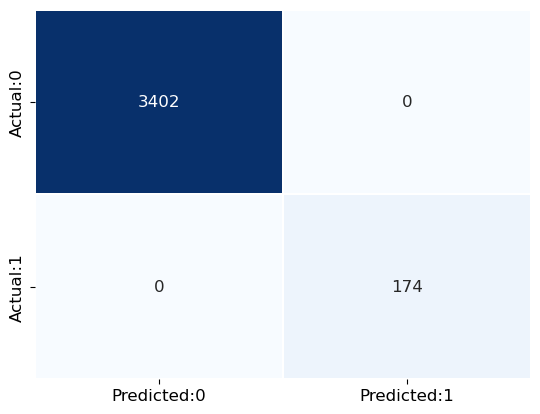

In [297]:
plot_confusion_matrix(rf_model,X_train,y_train)

In [298]:
report = get_test_report(rf_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.55


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3576
   macro avg       1.00      1.00      1.00      3576
weighted avg       1.00      1.00      1.00      3576



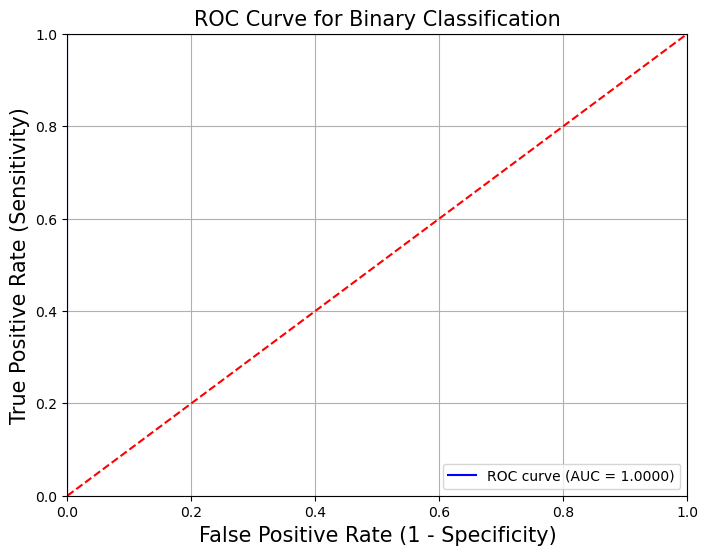

In [299]:
plot_roc(rf_model,X_train,y_train)

In [300]:
df_result.loc[8] = ['Random Forest Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000


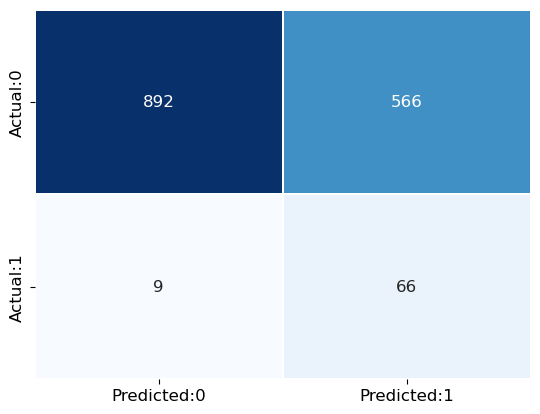

In [301]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [302]:
report = get_test_report(rf_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.03


              precision    recall  f1-score   support

           0       0.99      0.61      0.76      1458
           1       0.10      0.88      0.19        75

    accuracy                           0.62      1533
   macro avg       0.55      0.75      0.47      1533
weighted avg       0.95      0.62      0.73      1533



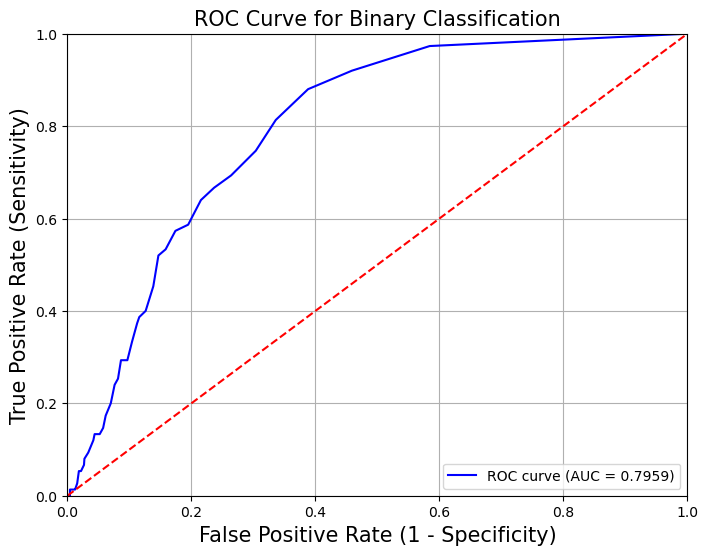

In [303]:
plot_roc(rf_model,X_test,y_test)

In [304]:
df_result.loc[9] = ['Random Forest Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Base Model - Test,0.6118,0.8800,0.7563,0.1867


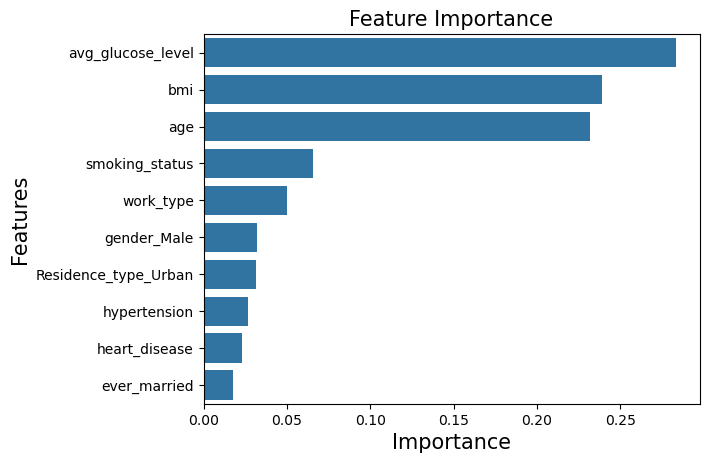

In [305]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

##### Gradient Boosting

In [306]:
gboost_model = GradientBoostingClassifier()

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier()

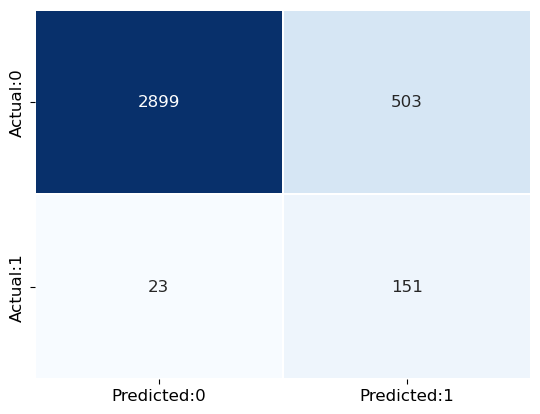

In [307]:
plot_confusion_matrix(gboost_model,X_train,y_train)

In [308]:
report = get_test_report(gboost_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.06590656759630613


              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3402
           1       0.23      0.87      0.36       174

    accuracy                           0.85      3576
   macro avg       0.61      0.86      0.64      3576
weighted avg       0.96      0.85      0.89      3576



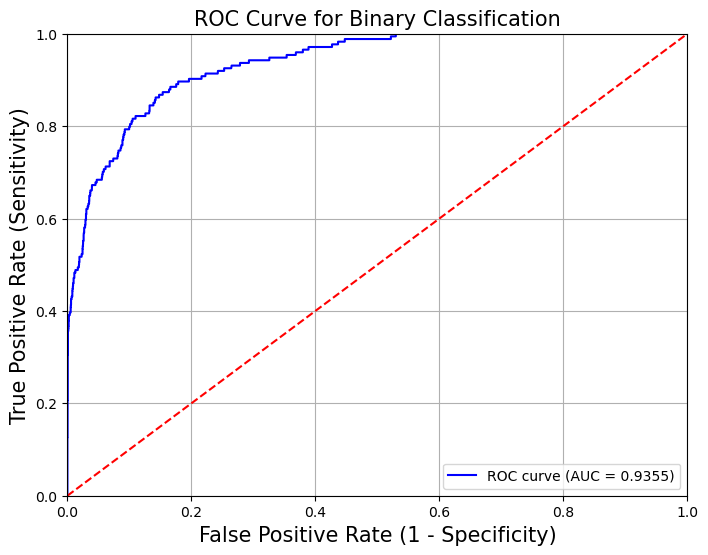

In [309]:
plot_roc(gboost_model,X_train,y_train)

In [310]:
df_result.loc[10] = ['Gradient Boosting Classifier Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Base Model - Test,0.6118,0.8800,0.7563,0.1867


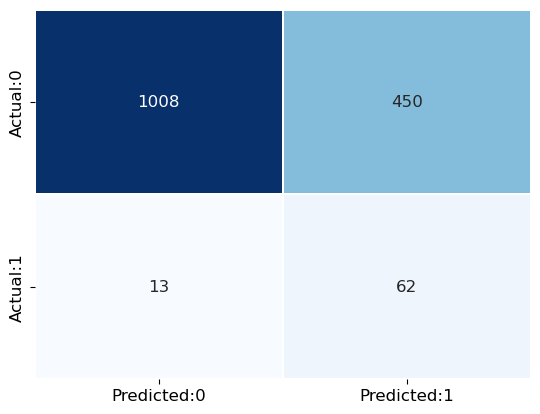

In [311]:
plot_confusion_matrix(gboost_model,X_test,y_test)

In [312]:
report = get_test_report(gboost_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.035154259705136165


              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1458
           1       0.12      0.83      0.21        75

    accuracy                           0.70      1533
   macro avg       0.55      0.76      0.51      1533
weighted avg       0.94      0.70      0.78      1533



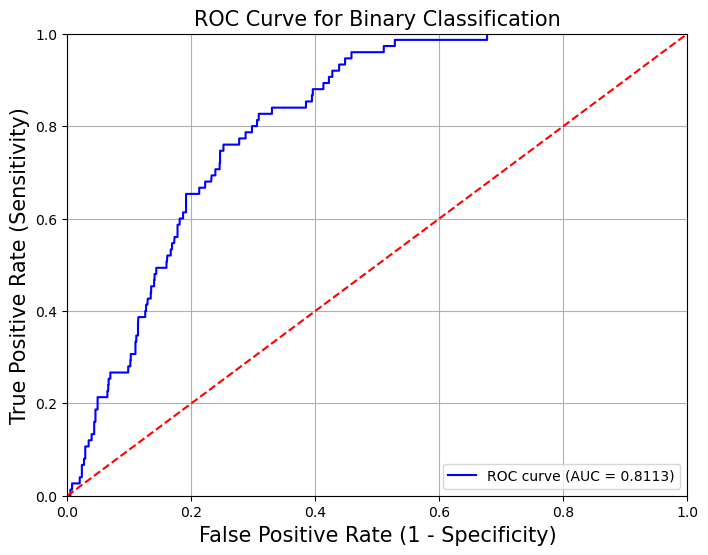

In [313]:
plot_roc(gboost_model,X_test,y_test)

In [314]:
df_result.loc[11] = ['Gradient Boosting Classifier Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Base Model - Test,0.6118,0.8800,0.7563,0.1867


##### XG Boosting

In [315]:
xgb_model = XGBClassifier()

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

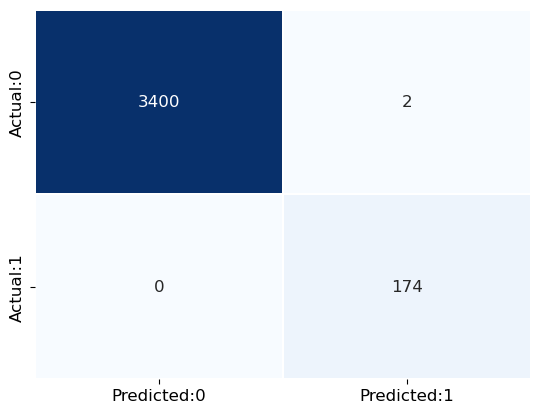

In [316]:
plot_confusion_matrix(xgb_model,X_train,y_train)

In [317]:
report = get_test_report(xgb_model,X_train,y_train)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.3820796012878418


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       0.99      1.00      0.99       174

    accuracy                           1.00      3576
   macro avg       0.99      1.00      1.00      3576
weighted avg       1.00      1.00      1.00      3576



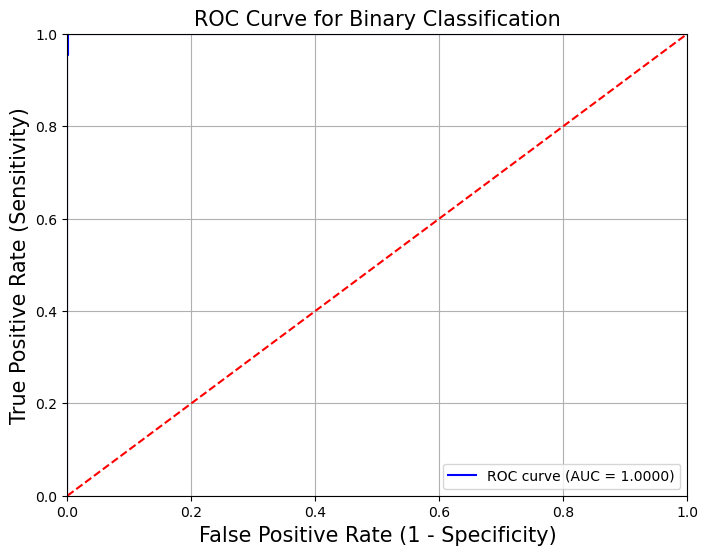

In [318]:
plot_roc(xgb_model,X_train,y_train)

In [319]:
df_result.loc[12] = ['XGBoosting Classifier Base Model - Train',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Base Model - Test,0.6118,0.8800,0.7563,0.1867


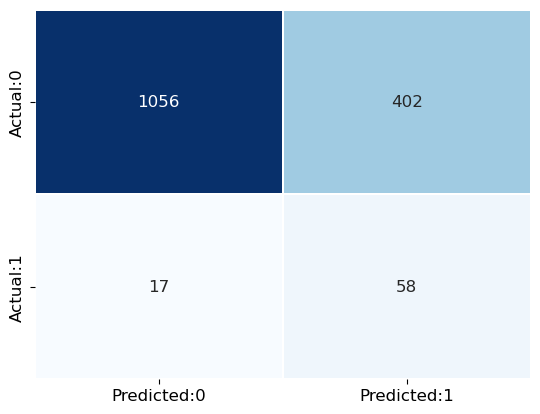

In [320]:
plot_confusion_matrix(xgb_model,X_test,y_test)

In [321]:
report = get_test_report(xgb_model,X_test,y_test)

recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.009661133401095867


              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1458
           1       0.13      0.77      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.80      1533



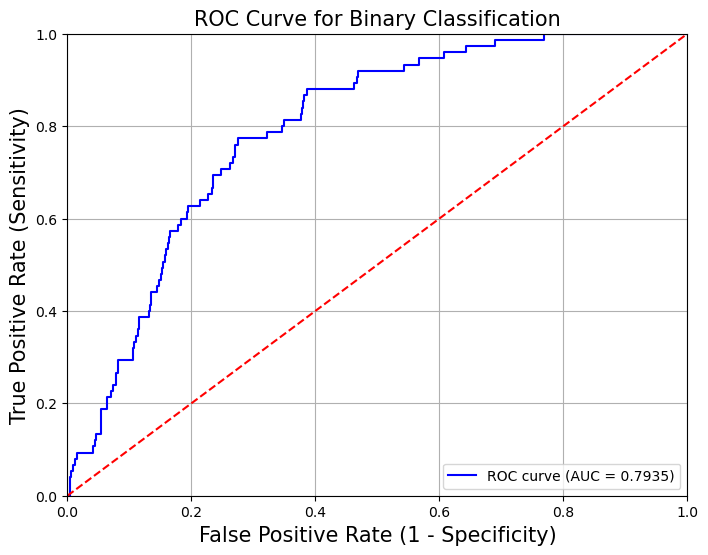

In [322]:
plot_roc(xgb_model,X_test,y_test)

In [323]:
df_result.loc[13] = ['XGBoosting Classifier Base Model - Test',recall_0, recall_1,f1score_0,f1score_1]
df_result

,Model Name,Recall 0,Recall 1,F1-Score 0,F1-Score 1
0,Logistic Regression Base Model - Train,0.6990,0.8793,0.8199,0.2265
1,Logistic Regression Base Model - Test,0.7524,0.7867,0.8534,0.2384
2,KNN Base Model - Train,0.8477,1.0000,0.9176,0.4018
3,KNN Base Model - Test,0.8025,0.4267,0.8761,0.1620
4,GaussianNB Base Model - Train,0.6984,0.7989,0.8175,0.2076
5,GaussianNB Base Model - Test,0.6324,0.8533,0.7712,0.1896
6,Decision tree Base Model - Train,1.0000,1.0000,1.0000,1.0000
7,Decision tree Base Model - Test,0.9390,0.1600,0.9474,0.1364
8,Random Forest Base Model - Train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Base Model - Test,0.6118,0.8800,0.7563,0.1867


**Best Performing Model**

Among the tested models, Gradient Boosting Classifier achieved the highest recall score, making it the preferred choice for stroke prediction. While high recall ensures fewer missed stroke cases, it may come at the cost of increased false positives. Further tuning and balancing of precision-recall trade-offs are recommended for optimal deployment.
